# Extract Data

First start by extracting the data.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

We use .head() to see a preview of our data, ensuring we are hapy with the extraction. 

In [2]:
penguins.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Next, we want to clean up the code to make it easier to visualize.

In [3]:
#Removes any row or columns with unavailable information that would make it hard to visuallize.
penguins = penguins.dropna(subset = ["Body Mass (g)", "Sex"])

#takes first name of species
penguins["Species"] = penguins["Species"].str.split().str.get(0)

#removes those with "." as sex which would again corrupt any data visualization
penguins = penguins[penguins["Sex"] != "."]

#drops columns that would be unreasonable to visualize
cols = ["Species", "Island", "Sex", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
penguins = penguins[cols]

#admire new dataset
penguins.head()

,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,Torgersen,MALE,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,FEMALE,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,FEMALE,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,MALE,39.3,20.6,190.0,3650.0


How pretty :^)

To make things easier to plot we can seperate the categorical and quantifiable data.

# NOW TO PLOT!!!

<Figure size 432x288 with 0 Axes>

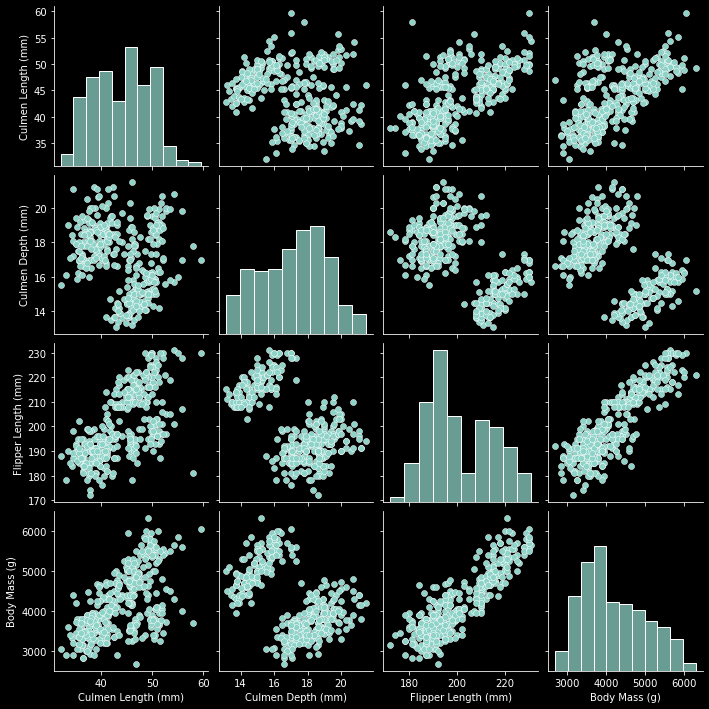

In [4]:

import seaborn as sns
#this is just for aesthetic purposes
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')
#categorical data
cat = ["Species", "Island", "Sex"]
#drop categorical data to get a broad visualization of possible quantifiable visualizations
sns.pairplot(penguins.drop(cat, axis = 1))


If you would like to get more specific visualizations because say, you see that the the graph of Culmen Length and Culmen Depth has three distinct clumps, you can easily pull that data out again using seaborn.

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

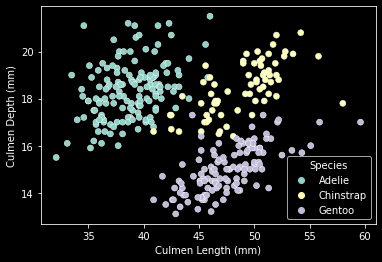

In [5]:
sns.scatterplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue = "Species")

See how easy that was! Now you can visualize your data like a pro.